# Caso Analista

## Descripción de los datos

- Hay 6 archivos .csv que contienen información de gestión de 100 clientes.
- Cada archivo representa un mes de 2022, comenzando en febrero y terminando en julio.
- 5 de estos archivos son datos históricos, de febrero a junio.
- Los datos correspondientes a julio son el objetivo principal de modelamiento.

**Nombre Variable** | **Descripción Variable** | **Observaciones** | **Ejemplo**
--- | --- | --- | ---
Cosecha | Mes de estudio | | 202001
IdCliente | Id interno del cliente | | 2222594
LoanID | Número Único Obligación Refinancia | Un cliente puede tener varias obligaciones | 4152191
SaldoCapital | Saldo del capital de la deuda | | 20.000.000,00 
DiasMora | Dias en mora a fecha compra del portafolio | | 498,00 
Fechacompra | Fecha de compra del portafolio | formato aaaa-mm-dd | 7/8/2016
Ciudad | Ciudad del Cliente | En algunos casos es el municipio | CALI
Departamento | Departamento del Cliente | | VALLE DEL CAUCA
TipoProducto | Tipo Producto Cliente | Libranza, Reestructurado, Crédito Rotativo, Sobregiro, Crédito Comercial, Tarjeta de Crédito, Hipotecario, Crédito Personal, No definido, Vehiculo, Retail Colombia, Codensa | Sobregiro
PagoRealizadosUlt6Meses | Valor del pago del cliente en los últimos seis meses | Enviaremos una columna por cada mes | 100000
FechaUltPago | Fecha del Ultimo pago registrado | formato aaaa-mm-dd | 2019-01-01
PagosTotales | Pagos hechos en refinancia antes de la cosecha de estudio | | 500000
LocalizaciónUlt6Meses | Si el cliente tuvo localización en los últimos 6 meses | 1: Si está localizado 0: De lo contrario | 1
AcuerdosUlt6Meses | Si el cliente ha tenido un acuerdo en los últimos seis meses | 1: Si tiene acuerdo 0: De lo contrario | 0
AcuerdosUlt3Meses | Si el cliente ha tenido un acuerdo en los últimos tres meses | 1: Si tiene acuerdo 0: De lo contrario | 0
Pago (Variable objetivo) | Si el cliente pagó en la cosecha de estudio | 1: Si pago 0: De lo contrario | 0

## Objetivo

¿Cuál es la probabilidad de pago para los 100 clientes durante julio?

## Carga de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Datos históricos

In [2]:
febrero = pd.read_csv('Historicos/Refinancia_202202.csv')
febrero.name = "Febrero"
marzo = pd.read_csv('Historicos/Refinancia_202203.csv')
marzo.name = "Marzo"
abril = pd.read_csv('Historicos/Refinancia_202204.csv')
abril.name = "Abril"
mayo = pd.read_csv('Historicos/Refinancia_202205.csv')
mayo.name = "Mayo"
junio = pd.read_csv('Historicos/Refinancia_202206.csv')
junio.name = "Junio"

### Datos julio

In [3]:
julio = pd.read_csv('Clientes_a_Calificar.csv')
julio.name = "Julio"

## Limpieza de datos

### Encabezado

#### Datos históricos

In [4]:
febrero.columns

Index(['Cosecha', 'IdCliente', 'LoanID', 'SaldoCapital', 'DiasMora',
       'FechaCompra', 'Ciudad', 'Departamento', 'TipoProducto',
       'PagosRealizadoUltMes', 'PagosRealizadoUlt2Meses',
       'PagosRealizadoUlt3Meses', 'PagosRealizadoUlt4Meses',
       'PagosRealizadoUlt5Meses', 'PagosRealizadoUlt6Meses', 'FechaUltPago',
       'PagosTotales', 'LocalizacionUlt6Meses', 'AcuerdosUlt6Meses',
       'AcuerdosUlt3Meses', 'SaldoxCliente', 'Fabrica', 'Canal', 'Pago'],
      dtype='object')

In [5]:
datos_historicos = [febrero, marzo, abril, mayo, junio]

from itertools import combinations
for i, j in combinations(datos_historicos, 2):
    print('-'.join([i.name, j.name]),':',(i.columns).equals(j.columns))

Febrero-Marzo : True
Febrero-Abril : True
Febrero-Mayo : True
Febrero-Junio : True
Marzo-Abril : True
Marzo-Mayo : True
Marzo-Junio : True
Abril-Mayo : True
Abril-Junio : True
Mayo-Junio : True


- Los nombres de las columnas de los datos históricos coinciden con la descripción y son iguales en todos los archivos.

#### Datos julio

In [6]:
julio.columns

Index(['Cosecha', 'IdCliente', 'LoanID', 'SaldoCapital', 'DiasMora',
       'FechaCompra', 'Ciudad', 'Departamento', 'TipoProducto',
       'PagosRealizadoUltMes', 'PagosRealizadoUlt2Meses',
       'PagosRealizadoUlt3Meses', 'PagosRealizadoUlt4Meses',
       'PagosRealizadoUlt5Meses', 'PagosRealizadoUlt6Meses', 'FechaUltPago',
       'PagosTotales', 'LocalizacionUlt6Meses', 'AcuerdosUlt6Meses',
       'AcuerdosUlt3Meses', 'SaldoxCliente', 'Fabrica', 'Canal'],
      dtype='object')

- Los nombres de las columnas de los datos de julio coinciden con la descripción.

### Consolidación de datos históricos en una tabla

In [7]:
historicos = pd.concat(datos_historicos).reset_index(drop=True)

### Datos faltantes

#### Datos históricos

##### Número de filas sólo con valores nulos

In [8]:
null_rows = historicos.isnull().all(axis = 1)
sum(null_rows)

0

##### Porcentaje de valores nulos por columna

In [9]:
historicos.isnull().sum()*(100/historicos.shape[0])

Cosecha                     0.000000
IdCliente                   0.000000
LoanID                      0.000000
SaldoCapital                0.000000
DiasMora                    0.000000
FechaCompra                 0.000000
Ciudad                      0.000000
Departamento                0.000000
TipoProducto                0.000000
PagosRealizadoUltMes        0.000000
PagosRealizadoUlt2Meses     0.000000
PagosRealizadoUlt3Meses     0.000000
PagosRealizadoUlt4Meses     0.000000
PagosRealizadoUlt5Meses     0.000000
PagosRealizadoUlt6Meses     0.000000
FechaUltPago               98.257141
PagosTotales                0.000000
LocalizacionUlt6Meses       0.000000
AcuerdosUlt6Meses           0.000000
AcuerdosUlt3Meses           0.000000
SaldoxCliente               0.000000
Fabrica                     0.000000
Canal                       0.000000
Pago                        0.000000
dtype: float64

- **FechaUltPago:** 
    - Es la única variable con valores nulos. Se asume que esto significa que los clientes nunca han pagado.
    - 98.25% de valores nulos vuelve esta variable inservible por si sola.
    - Las cantidades que se pueden inferir de esta columna ya estan representados por **DiasMora**.
    - Esta columna se elimina.

In [10]:
historicos.drop(['FechaUltPago'], axis = 1, inplace=True)

#### Datos julio

##### Número de filas sólo con valores nulos

In [11]:
null_rows = julio.isnull().all(axis = 1)
sum(null_rows)

0

##### Porcentaje de valores nulos por columna

In [12]:
julio.isnull().sum()*(100/julio.shape[0])

Cosecha                     0.0
IdCliente                   0.0
LoanID                      0.0
SaldoCapital                0.0
DiasMora                    0.0
FechaCompra                 0.0
Ciudad                      0.0
Departamento                0.0
TipoProducto                0.0
PagosRealizadoUltMes        0.0
PagosRealizadoUlt2Meses     0.0
PagosRealizadoUlt3Meses     0.0
PagosRealizadoUlt4Meses     0.0
PagosRealizadoUlt5Meses     0.0
PagosRealizadoUlt6Meses     0.0
FechaUltPago               97.0
PagosTotales                0.0
LocalizacionUlt6Meses       0.0
AcuerdosUlt6Meses           0.0
AcuerdosUlt3Meses           0.0
SaldoxCliente               0.0
Fabrica                     0.0
Canal                       0.0
dtype: float64

- **FechaUltPago:** 
    - Es la única variable con valores nulos. Se asume que esto significa que los clientes nunca han pagado.
    - 97% de valores nulos vuelve esta variable inservible por si sola.
    - Las cantidades que se pueden inferir de esta columna ya estan representados por **DiasMora**.
    - Esta columna se elimina.

In [13]:
julio.drop(['FechaUltPago'], axis = 1, inplace=True)

### Formato de datos

#### Fechas

In [14]:
dfs = [historicos, julio]

for i in dfs:
    i['Cosecha'] = pd.to_datetime(i['Cosecha'], format = '%Y%m')
    i['FechaCompra'] = pd.to_datetime(i['FechaCompra'], errors='coerce')

- Las variables **Cosecha** y **FechaCompra** se cambian tipo a *'datetime'*.

#### Datos nominales

In [15]:
noms_j = ['IdCliente', 'LoanID', 'Ciudad', 'Departamento', 'TipoProducto', 'LocalizacionUlt6Meses', 'AcuerdosUlt6Meses', 'AcuerdosUlt3Meses', 'Fabrica', 'Canal']
noms_h = noms_j.copy()
noms_h.append('Pago')

In [16]:
for i in noms_h:
    historicos[i] = pd.Categorical(historicos[i])
    
for i in noms_j:
    julio[i] = pd.Categorical(julio[i])

- Se ajustan las columnas nominales a tipo categoría

#### Datos numéricos

In [17]:
for df in dfs:
    # int columns downcasting
    ints = df.select_dtypes(include=['int']).columns.tolist()
    for i in ints:
        df[i] = pd.to_numeric(df[i], downcast ='integer')
    # float columns downcasting    
    floats = df.select_dtypes(include=['float']).columns.tolist()
    for f in floats:
        df[i] = pd.to_numeric(df[i], downcast ='float')

- Se hace downcasting a las variables númericas para ahorrar memoria.

## Breve Análisis Exploratorio

### Correlación

#### Datos históricos

<AxesSubplot:>

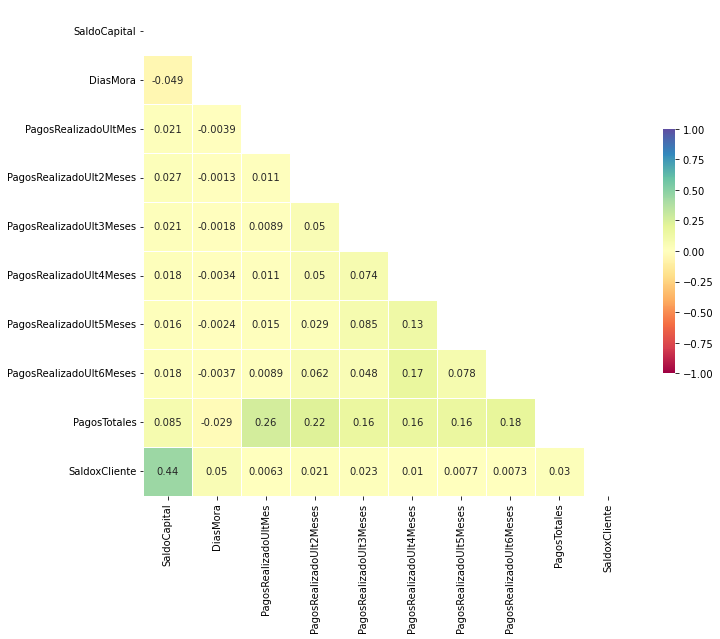

In [18]:
corr = historicos.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap='Spectral', vmin=-1, vmax=1, annot=True, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Datos julio

<AxesSubplot:>

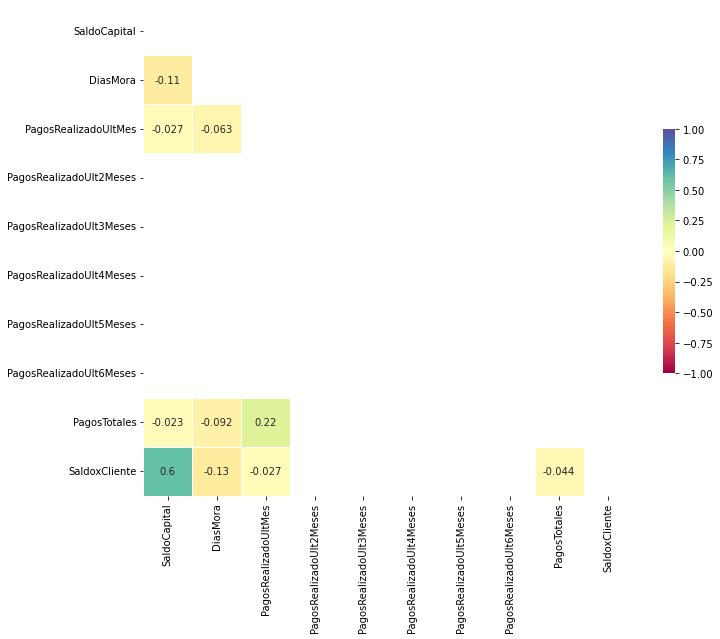

In [19]:
corr = julio.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap='Spectral', vmin=-1, vmax=1, annot=True, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

- Ninguna correlación es suficientemente alta para justificar una modificación a los datos.

### Distribución variable objetivo **Pago**

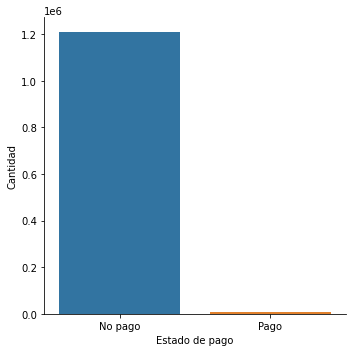

In [20]:
plot_data = pd.DataFrame(historicos['Pago'].value_counts()).rename(index={0:'No pago', 1:'Pago'}).reset_index().rename(columns={'index':'Estado de pago', 'Pago':'Cantidad'})
sns.catplot(data=plot_data, x="Estado de pago", y="Cantidad", kind="bar")

- La variable objetivo en los datos históricos esta imbalanceada.

## Transformación de Variables

- Las variables de fecha: **Cosecha** y **FechaCompra** no contribuyen mucha información por si solas porque no forman un a serie de timepo, ya sea por la poca cantidad de valores únicos y/o porque no son consecutivas.
- Sin embargo, se puede extraer información al calcular la diferencia en días entre las dos.
- Se eliminan las columnas **Cosecha** y **FechaCompra** y se crea la nueva variable **deltaCosechaFechaCompra** que representa el calculo anteriormente mencionadp. 

In [21]:
days_h = pd.to_numeric((historicos['Cosecha'] - historicos['FechaCompra']).dt.days, downcast='integer')
historicos.insert(0, 'deltaCosechaFechaCompra', days_h)
historicos.drop(['Cosecha', 'FechaCompra'], axis=1, inplace=True)

In [22]:
days_j = pd.to_numeric((julio['Cosecha'] - julio['FechaCompra']).dt.days, downcast='integer')
julio.insert(0, 'deltaCosechaFechaCompra', days_j)
julio.drop(['Cosecha', 'FechaCompra'], axis=1, inplace=True)

## Modelamiento

### Preprocesamiento

***

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
text = ['Ciudad', 'Departamento', 'TipoProducto', 'Fabrica', 'Canal']
le = LabelEncoder()
encoders = {}

In [25]:
for i in text:
    le.fit(historicos[i])
    encoders[i] = le
    x = le.transform(historicos[i])
    historicos[i] = pd.Categorical(x)
    z = le.transform(julio[i])
    julio[i] = pd.Categorical(z)    

***

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
model_data = historicos.copy()
X = model_data.loc[:, model_data.columns != 'Pago']
y = model_data.loc[:, ['Pago']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20, stratify = y)
y_train, y_test = np.ravel(y_train), np.ravel(y_test)

***

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
floats = X.select_dtypes(include=['float']).columns.tolist()
scaler = StandardScaler()

Xf_train_scaled, Xf_test_scaled = scaler.fit_transform(X_train[floats]), scaler.fit_transform(X_test[floats])

In [31]:
non_num = X.select_dtypes(exclude=['float']).columns.tolist()

Xfs_train = pd.DataFrame(Xf_train_scaled, index=X_train.index, columns=floats)
Xfs_test = pd.DataFrame(Xf_test_scaled, index=X_test.index, columns=floats)

In [32]:
Xs_train = Xfs_train.join(X_train[non_num])
Xs_test = Xfs_test.join(X_test[non_num])

***

In [33]:
from imblearn.over_sampling import RandomOverSampler

In [34]:
sampling_strategy = 1

ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_train_final, y_train_final = ros.fit_resample(Xs_train, y_train)

### Linear SVC

In [35]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

In [36]:
LSCV_parameters = {'C':[0.1,1,10], 'dual':[False]}
LSVC = LinearSVC()

In [37]:
LSVC_cv = GridSearchCV(LSVC, LSCV_parameters, cv = 3, scoring='f1')
LSVC_cv.fit(X_train_final, y_train_final)
print('Best parameters', LSVC_cv.best_params_)

Best parameters {'C': 0.1, 'dual': False}


In [38]:
LSVC_model = LinearSVC(C=0.1, dual=False)
LSVC_model.fit(X_train_final, y_train_final)
LSVC_pred = LSVC_model.predict(Xs_test)

### K Nearest Neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train_final, y_train_final)
KNN_pred = KNN_model.predict(Xs_test)

### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
parameters ={'C':[0.1,1,10], 'solver':['liblinear', 'lbfgs'], 'max_iter':[1000]}
LR = LogisticRegression()

In [43]:
LR_cv = GridSearchCV(LR, parameters, cv = 3, scoring='f1')
LR_cv.fit(X_train_final, y_train_final)
print('Best parameters', LR_cv.best_params_)

Best parameters {'C': 0.1, 'max_iter': 1000, 'solver': 'liblinear'}


In [44]:
LR_model = LogisticRegression(C=0.1, max_iter=1000, solver='liblinear')
LR_model.fit(X_train_final, y_train_final)
LR_pred = LR_model.predict(Xs_test)

### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
max_features = round(np.sqrt(X.shape[1]))-1
RF_model = RandomForestClassifier(max_features=max_features, random_state=0)
RF_model.fit(X_train_final, y_train_final)
RF_pred = RF_model.predict(Xs_test)

### Metricas

In [51]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [54]:
LSVC_cr = classification_report(y_test, LSVC_pred, target_names=LSVC_model.classes_, output_dict =True)
KNN_cr = classification_report(y_test, KNN_pred, target_names=KNN_model.classes_, output_dict =True)
LR_cr = classification_report(y_test, LR_pred, target_names=LR_model.classes_, output_dict =True)
RF_cr = classification_report(y_test, RF_pred, target_names=RF_model.classes_, output_dict =True)

In [63]:
reports = [LSVC_cr, KNN_cr, LR_cr, RF_cr]
columns = []

for i in reports:
    x = pd.DataFrame(i).loc[['precision', 'recall', 'f1-score'],'weighted avg']
    columns.append(x)

In [78]:
names = ['Linear SVC', 'KNN', 'Logistic Regression', 'Random Forest']
df_dict = {i:j for i, j in zip(names, columns)}

In [69]:
LSVC_pred_prob = LSVC_model.decision_function(Xs_test)
LSVC_roc = roc_auc_score(y_test, LSVC_pred_prob)

KNN_pred_prob = KNN_model.predict_proba(Xs_test)
KNN_roc = roc_auc_score(y_test, KNN_pred_prob[:,1])

LR_pred_prob = LR_model.predict_proba(Xs_test)
LR_roc = roc_auc_score(y_test, LR_pred_prob[:,1])

RF_pred_prob = RF_model.predict_proba(Xs_test)
RF_roc = roc_auc_score(y_test, RF_pred_prob[:,1])

In [93]:
aucs = [LSVC_roc, KNN_roc, LR_roc, RF_roc]

for i, j in zip(df_dict, aucs):
    df_dict[i] = pd.concat([df_dict[i], pd.Series(j, index=['area under curve'])])

In [95]:
df_cr = pd.DataFrame(df_dict)
df_cr

,Linear SVC,KNN,Logistic Regression,Random Forest
precision,0.991622,0.992055,0.991628,0.994237
recall,0.569829,0.986529,0.570009,0.995410
f1-score,0.721228,0.989111,0.721374,0.994175
area under curve,0.641359,0.655747,0.641438,0.866459


- Se escoge el modelo de Random Forest para evaluar los datos del mes de julio porque presenta los mejores resultados en todas las categorías.

## Evaluación

### Preprocesamiento

In [115]:
scaler = StandardScaler()

Xf_scaled_julio = scaler.fit_transform(julio[floats])

In [116]:
Xfs_julio = pd.DataFrame(Xf_scaled_julio, index=julio.index, columns=floats)
Xs_julio = Xfs_julio.join(julio[non_num])

### Random Forest

In [117]:
julio_pred = RF_model.predict(Xs_julio)
julio_pred_prob = RF_model.predict_proba(Xs_julio)

### Probabilidades

In [131]:
df_julio_prob = pd.DataFrame(data=julio_pred_prob[:,1], columns=['ProbabilidadPago'], index=julio['IdCliente'])
df_julio_prob.sort_values(by='ProbabilidadPago', ascending=False)

,ProbabilidadPago
IdCliente,
2187392,0.44
2858489,0.05
3664705,0.05
1931681,0.04
3093657,0.04
...,...
3437623,0.00
4828,0.00
3629794,0.00


## Autor

Nicolás Hernández Saboya  
nikhs2092@gmail.com  
[LinkedIn](https://www.linkedin.com/in/nicolas-hernandez-data-science/)